In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read data and view data information

In [36]:
df = pd. read_csv("/Users/apple/Desktop/Life-Expectancy-Data-Updated.csv")
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Afghanistan,Asia,2000,90.5,129.2,310.8305,0.02,62,12,21.7,...,24,0.02,148,20.78,2.3,2.5,2.2,0,1,55.8
1,Afghanistan,Asia,2001,87.9,125.2,304.8580,0.02,63,13,21.8,...,33,0.02,163,21.61,2.1,2.4,2.2,0,1,56.3
2,Afghanistan,Asia,2002,85.3,121.1,298.8855,0.02,64,14,21.9,...,36,0.02,320,22.60,19.9,2.2,2.3,0,1,56.8
3,Afghanistan,Asia,2003,82.7,116.9,292.0365,0.02,65,15,22.0,...,41,0.02,332,23.68,19.7,19.9,2.4,0,1,57.3
4,Afghanistan,Asia,2004,80.0,112.6,285.1880,0.02,67,16,22.1,...,50,0.02,323,24.73,19.5,19.7,2.5,0,1,57.8


In [37]:
# Define a new column: Economy_status
df.loc[df['Economy_status_Developed'] == 1, 'Economy status'] = 'Developed'
df.loc[df['Economy_status_Developed'] == 0, 'Economy status'] = 'Developing'
df['Economy status'].value_counts()
df = df.drop(['Economy_status_Developed','Economy_status_Developing'],axis=1)
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy,Economy status
0,Afghanistan,Asia,2000,90.5,129.2,310.8305,0.02,62,12,21.7,24,24,0.02,148,20.78,2.3,2.5,2.2,55.8,Developing
1,Afghanistan,Asia,2001,87.9,125.2,304.8580,0.02,63,13,21.8,35,33,0.02,163,21.61,2.1,2.4,2.2,56.3,Developing
2,Afghanistan,Asia,2002,85.3,121.1,298.8855,0.02,64,14,21.9,36,36,0.02,320,22.60,19.9,2.2,2.3,56.8,Developing
3,Afghanistan,Asia,2003,82.7,116.9,292.0365,0.02,65,15,22.0,41,41,0.02,332,23.68,19.7,19.9,2.4,57.3,Developing
4,Afghanistan,Asia,2004,80.0,112.6,285.1880,0.02,67,16,22.1,50,50,0.02,323,24.73,19.5,19.7,2.5,57.8,Developing


In [38]:
df.columns = ['Country', 'Region', 'Year', 'Infant Deaths', 'Under_Five Deaths',
       'Adult Mortality', 'Alcohol Consumption', 'Hepatitis B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents of HIV', 'GDP(per capita)',
       'Population', 'Thinness (ten to nineteen years)',
       'Thinness (five to nine years)', 'Schooling', 'Life Expectancy', 'Economy Status']

In [39]:
print(df.shape)
print(df.info())
print(df.columns)

(2864, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           2864 non-null   object 
 1   Region                            2864 non-null   object 
 2   Year                              2864 non-null   int64  
 3   Infant Deaths                     2864 non-null   float64
 4   Under_Five Deaths                 2864 non-null   float64
 5   Adult Mortality                   2864 non-null   float64
 6   Alcohol Consumption               2864 non-null   float64
 7   Hepatitis B                       2864 non-null   int64  
 8   Measles                           2864 non-null   int64  
 9   BMI                               2864 non-null   float64
 10  Polio                             2864 non-null   int64  
 11  Diphtheria                        2864 non-null   int64  


|Field|Description|
|---:|:---|
|Country|Country|
|Region|179 countries are distributed in 9 regions. E.g. Africa, Asia, Oceania, European Union, Rest of Europe and etc|
|Year|Year|
|Infant Deaths|Number of Infant Deaths per 1000 population|
|Under-Five Deaths|Number of deaths of children under five years old per 1000 population|
|Adult Mortality|Number of deaths of adults per 1000 population|
|Alcohol Consumption|Alcohol consumption that is recorded in liters of pure alcohol per capita with 15+ years old|
|Hepatitis B|Coverage of Hepatitis B (HepB3) immunization among 1-year-olds (%)|
|Measles|Coverage of Measles containing vaccine first dose (MCV1) immunization among 1-year-olds (%)|
|BMI|Average Body Mass Index of entire population|
|Polio|Coverage of Polio (Pol3) immunization among 1-year-olds (%)|
|Diphtheria|Coverage of Diphtheria tetanus toxoid and pertussis (DTP3) immunization among 1-year-olds (%)|
|Incidents of HIV|Incidents of HIV per 1000 population aged 15-49|
|GDP(per capita)|Gross Domestic Product per capita (in USD)|
|Population|Total population in millions|
|Thinness (ten to nineteen years)|Prevalence of thinness among adolescents aged 10-19 years. BMI < -2 standard deviations below the median（%）|
|Thinness (five to nine years)|Prevalence of thinness among children aged 5-9 years. BMI < -2 standard deviations below the median（%）|
|Schooling|Average years that people aged 25+ spent in formal education|
|Life Expectancy|Average life expectancy of both genders in different years from 2000 to 2015|
|Economy Status|Developed or Developing status|

In [40]:
Y = df['Life Expectancy']
ftr_name = ['Region', 'Infant Deaths', 'Under_Five Deaths',
       'Adult Mortality', 'Alcohol Consumption', 'Hepatitis B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents of HIV', 'GDP(per capita)',
       'Population', 'Thinness (ten to nineteen years)',
       'Thinness (five to nine years)', 'Schooling', 'Economy Status']
X = df.loc[:,ftr_name]
group = df['Country']
year = df['Year']


In [41]:
print(Y.head())
print(X.head())

0    55.8
1    56.3
2    56.8
3    57.3
4    57.8
Name: Life Expectancy, dtype: float64
  Region  Infant Deaths  Under_Five Deaths  Adult Mortality  \
0   Asia           90.5              129.2         310.8305   
1   Asia           87.9              125.2         304.8580   
2   Asia           85.3              121.1         298.8855   
3   Asia           82.7              116.9         292.0365   
4   Asia           80.0              112.6         285.1880   

   Alcohol Consumption  Hepatitis B  Measles   BMI  Polio  Diphtheria  \
0                 0.02           62       12  21.7     24          24   
1                 0.02           63       13  21.8     35          33   
2                 0.02           64       14  21.9     36          36   
3                 0.02           65       15  22.0     41          41   
4                 0.02           67       16  22.1     50          50   

   Incidents of HIV  GDP(per capita)  Population  \
0              0.02              148      

### 2. EDA (Exploratory data analysis)

In [42]:
Y.describe()

count    2864.000000
mean       68.856075
std         9.405608
min        39.400000
25%        62.700000
50%        71.400000
75%        75.400000
max        83.800000
Name: Life Expectancy, dtype: float64

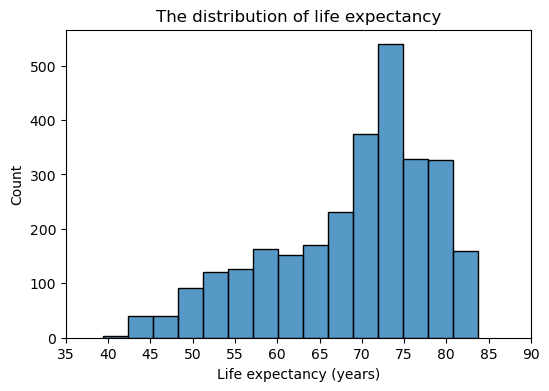

In [43]:
plt.figure(figsize=(6,4))
sns.histplot(Y, bins=15)
plt.xticks(list(range(35,95,5)))
plt.title('The distribution of life expectancy')
plt.xlabel('Life expectancy (years)')
plt.savefig('/Users/apple/Desktop/Data 1030/Individual Project/Figure/The distribution of life expectancy.png',dpi=300)

In [44]:
X.describe()

,Infant Deaths,Under_Five Deaths,Adult Mortality,Alcohol Consumption,Hepatitis B,Measles,BMI,Polio,Diphtheria,Incidents of HIV,GDP(per capita),Population,Thinness (ten to nineteen years),Thinness (five to nine years),Schooling
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123
std,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556
min,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000
25%,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000
50%,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000
75%,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000
max,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000


   Infant Deaths  Under_Five Deaths  Adult Mortality  Alcohol Consumption  \
0           90.5              129.2         310.8305                 0.02   
1           87.9              125.2         304.8580                 0.02   
2           85.3              121.1         298.8855                 0.02   
3           82.7              116.9         292.0365                 0.02   
4           80.0              112.6         285.1880                 0.02   

   Hepatitis B  Measles   BMI  Polio  Diphtheria  Incidents of HIV  \
0           62       12  21.7     24          24              0.02   
1           63       13  21.8     35          33              0.02   
2           64       14  21.9     36          36              0.02   
3           65       15  22.0     41          41              0.02   
4           67       16  22.1     50          50              0.02   

   GDP(per capita)  Population  Thinness (ten to nineteen years)  \
0              148       20.78                  

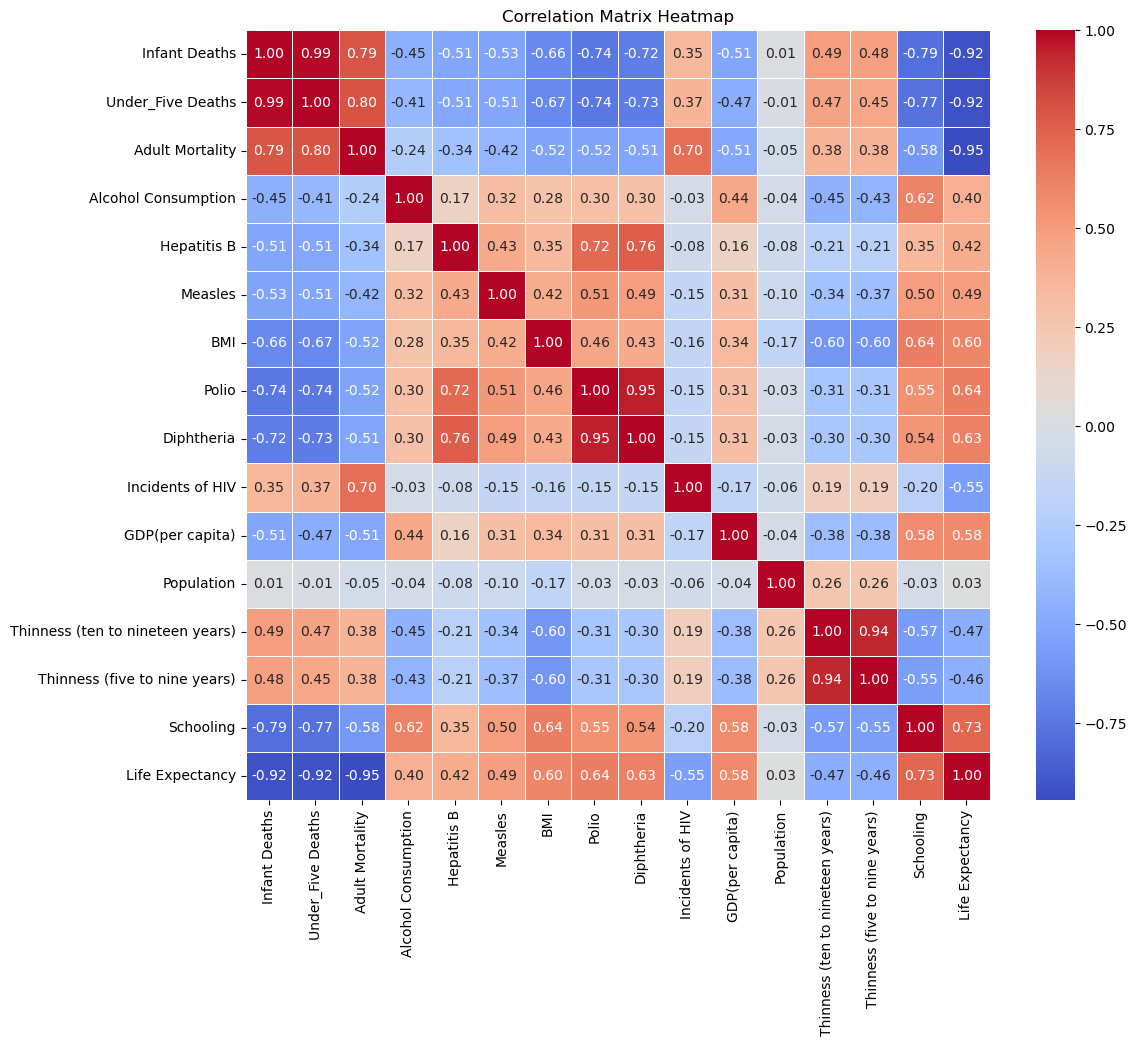

In [46]:
# Calculate the correlation matrix
X1 = X.loc[:,X.columns != 'Country']
X2 = X1.loc[:,X1.columns != 'Region']
X3 = X2.loc[:,X2.columns != 'Economy Status']
Z = pd.concat([X3,Y],axis=1)
print(Z.head())
corr_mat = Z.corr(method='pearson')

# Create a heatmap using seaborn
plt.figure(figsize=(12,10))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.savefig('/Users/apple/Desktop/Data 1030/Individual Project/Figure/Correlation Matrix Heatmap.png',dpi=600)
plt.show()

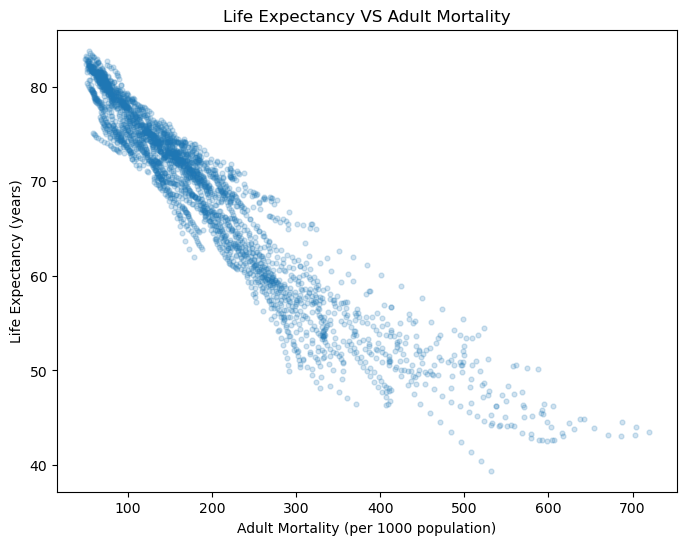

In [54]:
df.plot.scatter('Adult Mortality','Life Expectancy',figsize=(8,6),alpha=0.2,s=12)
plt.xlabel('Adult Mortality (per 1000 population)')
plt.ylabel('Life Expectancy (years)')
plt.title('Life Expectancy VS Adult Mortality')
plt.savefig('/Users/apple/Desktop/Data 1030/Individual Project/Figure/Life Expectancy VS Adult Mortality(Scatter Plot).png',dpi=600)
plt.show()

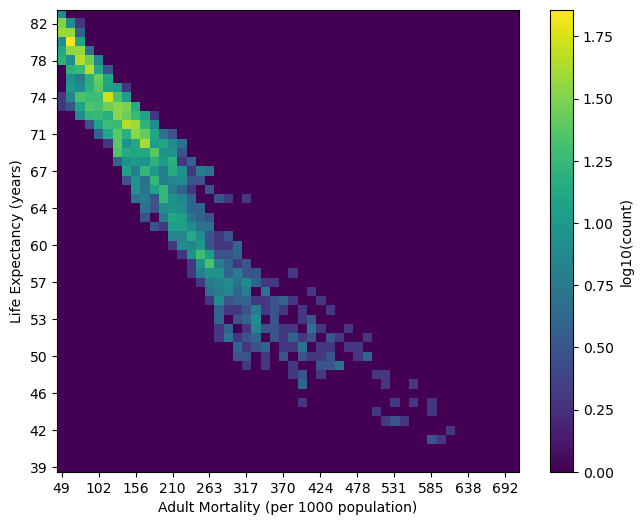

In [55]:
nbins = 50

heatmap, xedges, yedges = np.histogram2d(df['Adult Mortality'], df['Life Expectancy'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined

plt.figure(figsize=(8,6))

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
plt.xlabel('Adult Mortality (per 1000 population)')
plt.ylabel('Life Expectancy (years)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.savefig('/Users/apple/Desktop/Data 1030/Individual Project/Figure/Life Expectancy VS Adult Mortality(Heatmap).png',dpi=600)
plt.show()

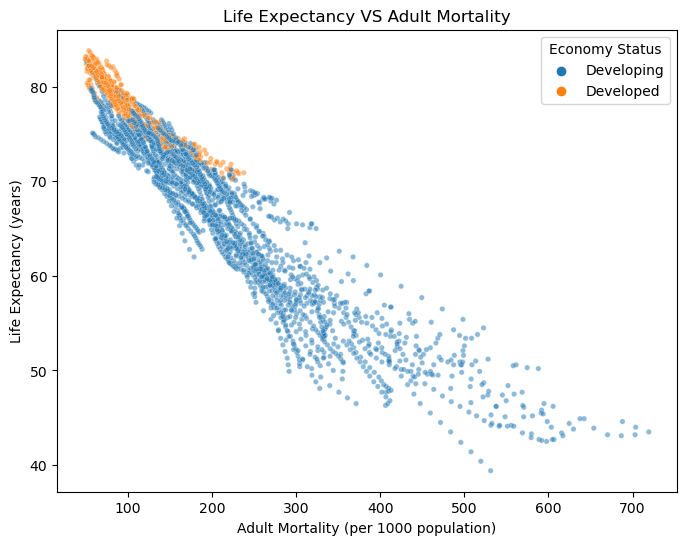

In [71]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Adult Mortality'], y=df['Life Expectancy'], 
                hue=df['Economy Status'],s=15,alpha=0.5)
plt.xlabel('Adult Mortality (per 1000 population)')
plt.ylabel('Life Expectancy (years)')
plt.title('Life Expectancy VS Adult Mortality')
plt.savefig('/Users/apple/Desktop/Data 1030/Individual Project/Figure/Life Expectancy VS Adult Mortality(Scatter Plot,group by Economy Status).png',dpi=600)
plt.show()

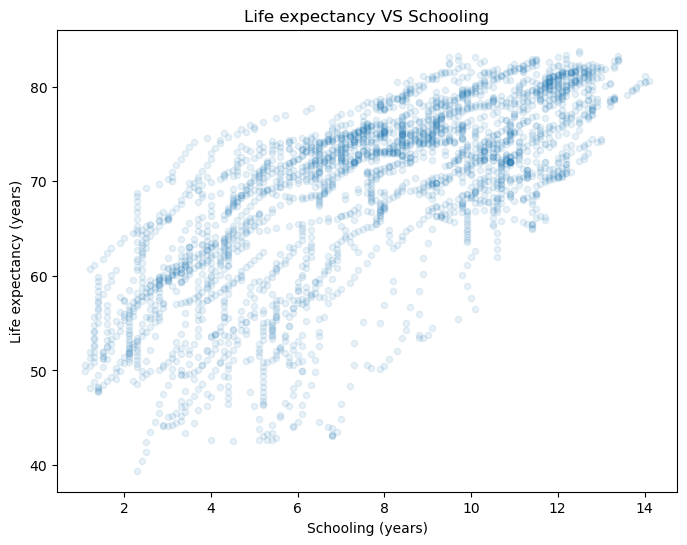

In [72]:
df.plot.scatter('Schooling','Life Expectancy',figsize=(8,6),alpha=0.1,s=20)
plt.xlabel('Schooling (years)')
plt.ylabel('Life expectancy (years)')
plt.title('Life expectancy VS Schooling')
plt.savefig('/Users/apple/Desktop/Data 1030/Individual Project/Figure/Life Expectancy VS Schooling(Scatter Plot).png',dpi=600)
plt.show()

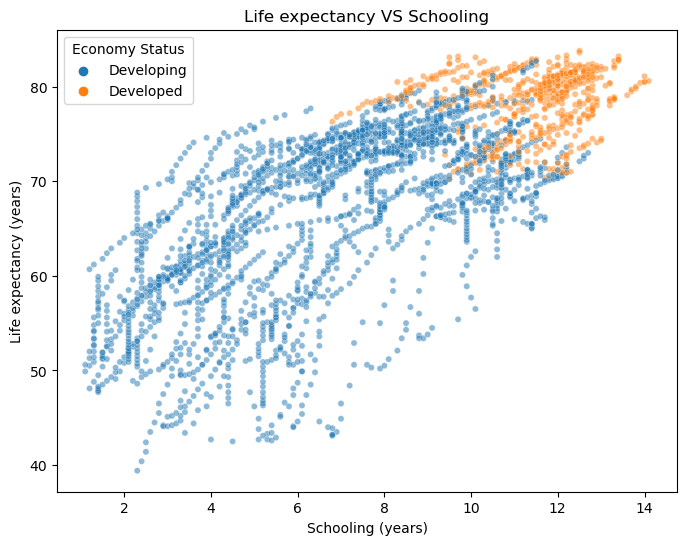

In [78]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Schooling'], y=df['Life Expectancy'], 
                hue=df['Economy Status'],s=20,alpha=0.5)
plt.xlabel('Schooling (years)')
plt.ylabel('Life expectancy (years)')
plt.title('Life expectancy VS Schooling')
plt.savefig('/Users/apple/Desktop/Data 1030/Individual Project/Figure/Life Expectancy VS Schooling(Scatter Plot,group by Economy Status).png',dpi=600)
plt.show()

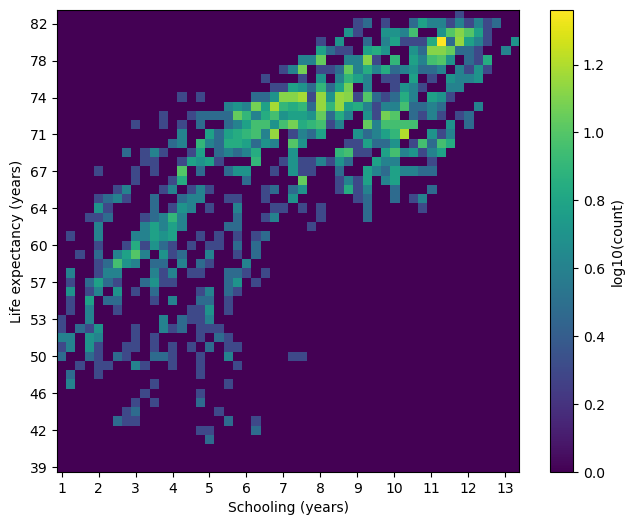

In [75]:
nbins = 50

heatmap, xedges, yedges = np.histogram2d(df['Schooling'], df['Life Expectancy'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined

plt.figure(figsize=(8,6))

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
plt.xlabel('Schooling (years)')
plt.ylabel('Life expectancy (years)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.savefig('/Users/apple/Desktop/Data 1030/Individual Project/Figure/Life Expectancy VS Schooling(Heatmap).png',dpi=600)
plt.show()

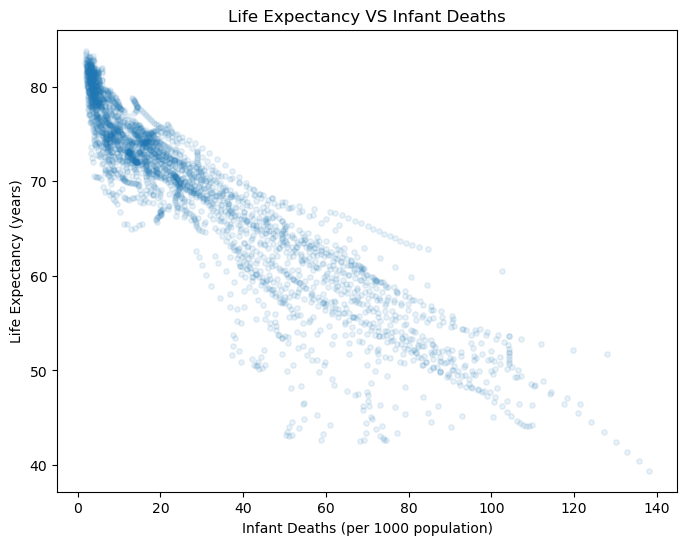

In [76]:
df.plot.scatter('Infant Deaths','Life Expectancy',figsize=(8,6),alpha=0.1,s=15)
plt.xlabel('Infant Deaths (per 1000 population)')
plt.ylabel('Life Expectancy (years)')
plt.title('Life Expectancy VS Infant Deaths')
plt.savefig('/Users/apple/Desktop/Data 1030/Individual Project/Figure/Life Expectancy VS Infant Deaths(Scatter Plot).png',dpi=600)
plt.show()

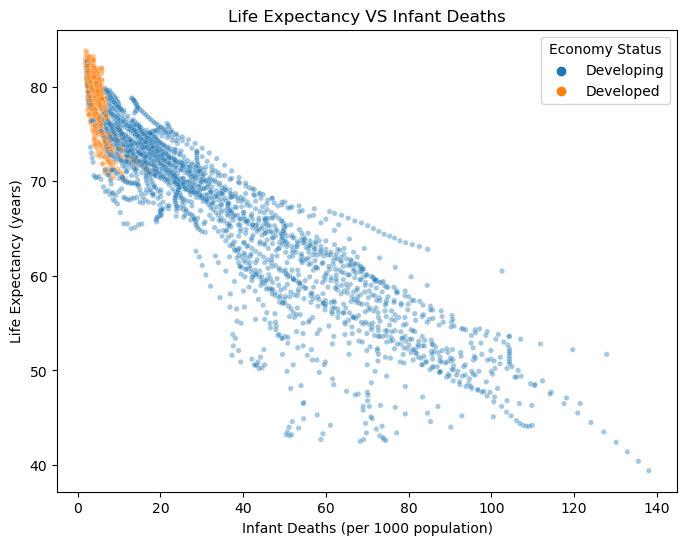

In [82]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Infant Deaths'], y=df['Life Expectancy'], 
                hue=df['Economy Status'],s=15,alpha=0.4)
plt.xlabel('Infant Deaths (per 1000 population)')
plt.ylabel('Life Expectancy (years)')
plt.title('Life Expectancy VS Infant Deaths')
plt.savefig('/Users/apple/Desktop/Data 1030/Individual Project/Figure/Life Expectancy VS Infant Deaths(Scatter Plot,group by Economy Status).png',dpi=600)
plt.show()

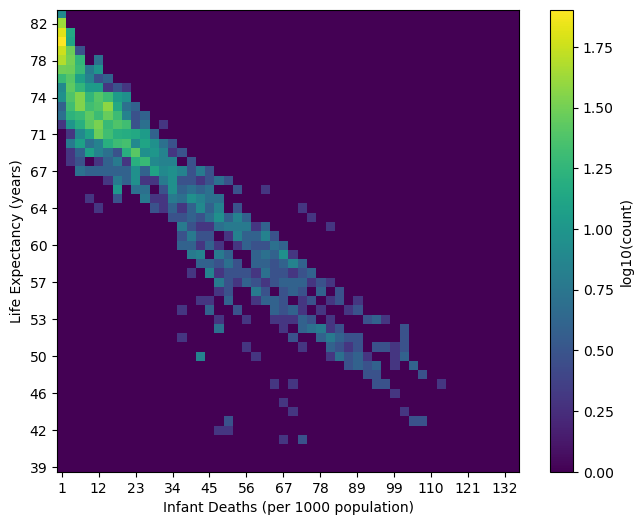

In [83]:
nbins = 50

heatmap, xedges, yedges = np.histogram2d(df['Infant Deaths'], df['Life Expectancy'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined

plt.figure(figsize=(8,6))
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
plt.xlabel('Infant Deaths (per 1000 population)')
plt.ylabel('Life Expectancy (years)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.savefig('/Users/apple/Desktop/Data 1030/Individual Project/Figure/Life Expectancy VS Infant Deaths(Heatmap).png',dpi=600)
plt.show()

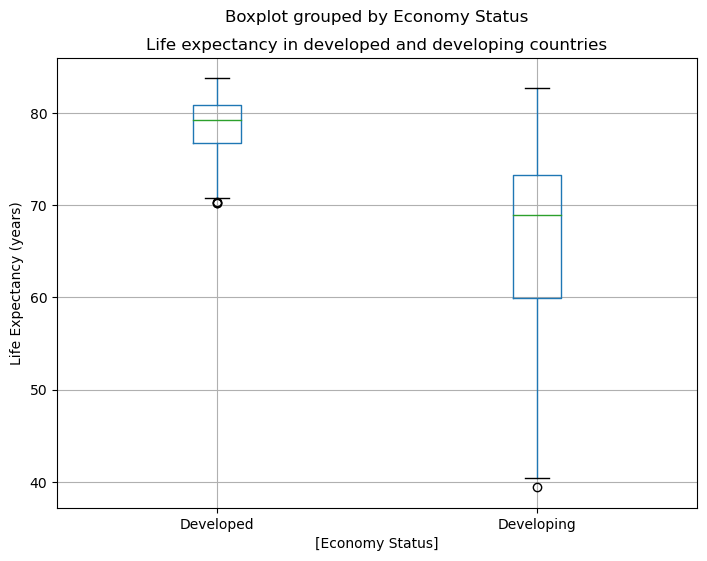

In [84]:
df[['Life Expectancy','Economy Status']].boxplot(by='Economy Status',figsize=(8,6))
plt.ylabel('Life Expectancy (years)')
plt.title('Life expectancy in developed and developing countries')
plt.savefig('/Users/apple/Desktop/Data 1030/Individual Project/Figure/Life expectancy in developed and developing countries(boxplot).png',dpi=600)
plt.show()

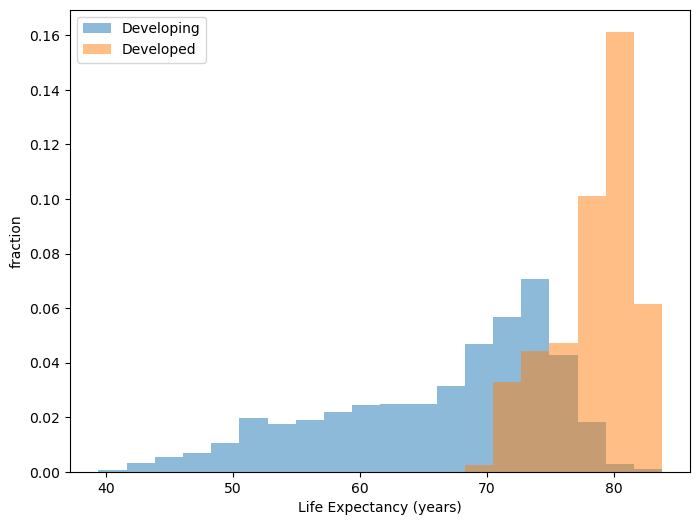

In [85]:
categories = df['Economy Status'].unique()
bin_range = (df['Life Expectancy'].min(),df['Life Expectancy'].max())

plt.figure(figsize=(8,6))

for c in categories:
    plt.hist(df[df['Economy Status']==c]['Life Expectancy'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('Life Expectancy (years)')
plt.savefig('/Users/apple/Desktop/Data 1030/Individual Project/Figure/Life expectancy in developed and developing countries(barplot).png',dpi=600)
plt.show()

In [86]:
df['Region'].value_counts()

Region
Africa                           816
Asia                             432
European Union                   432
Central America and Caribbean    304
Rest of Europe                   240
Middle East                      224
South America                    192
Oceania                          176
North America                     48
Name: count, dtype: int64

In [101]:
pd.pivot_table(data=df[['Life Expectancy','Region']], index=['Region'], aggfunc='mean')

,Life Expectancy
Region,
Africa,57.847304
Asia,69.454861
Central America and Caribbean,72.437500
European Union,77.715046
Middle East,73.975446
North America,77.841667
Oceania,69.517614
Rest of Europe,74.525417
South America,72.780729


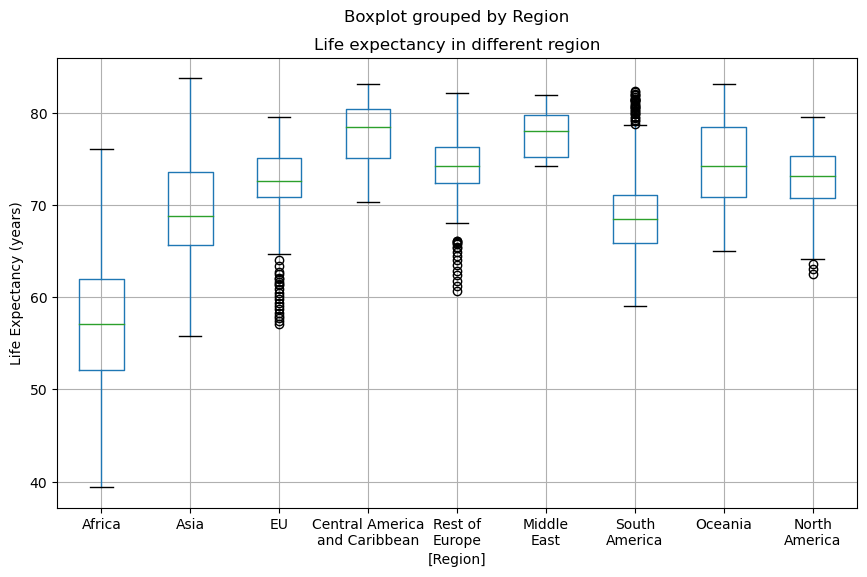

In [95]:
df[['Life Expectancy','Region']].boxplot(by='Region',figsize=(10,6))
plt.ylabel('Life Expectancy (years)')
plt.xticks([1,2,3,4,5,6,7,8,9],['Africa','Asia','EU','Central America\nand Caribbean','Rest of\nEurope','Middle\nEast','South\nAmerica','Oceania','North\nAmerica'])
plt.title('Life expectancy in different region')
plt.savefig('/Users/apple/Desktop/Data 1030/Individual Project/Figure/Life expectancy in different region(boxplot).png',dpi=600)
plt.show()

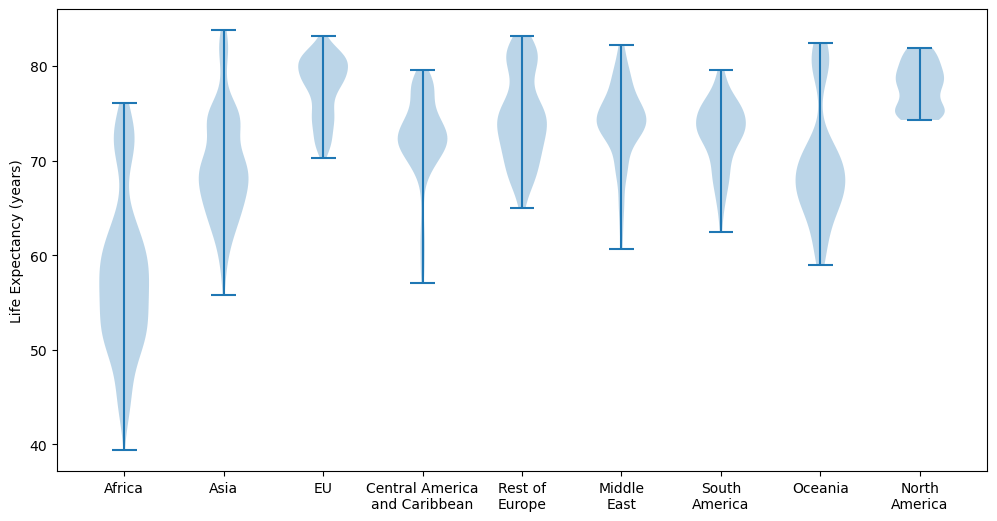

In [97]:
dataset = [df[df['Region']=='Africa']['Life Expectancy'].values,
           df[df['Region']=='Asia']['Life Expectancy'].values,
           df[df['Region']=='European Union']['Life Expectancy'].values,
           df[df['Region']=='Central America and Caribbean']['Life Expectancy'].values,
           df[df['Region']=='Rest of Europe']['Life Expectancy'].values,
           df[df['Region']=='Middle East']['Life Expectancy'].values,
           df[df['Region']=='South America']['Life Expectancy'].values,
           df[df['Region']=='Oceania']['Life Expectancy'].values,
           df[df['Region']=='North America']['Life Expectancy'].values]

plt.figure(figsize=(12,6))

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4,5,6,7,8,9],['Africa','Asia','EU','Central America\nand Caribbean','Rest of\nEurope','Middle\nEast','South\nAmerica','Oceania','North\nAmerica'])
plt.ylabel('Life Expectancy (years)')
plt.savefig('/Users/apple/Desktop/Data 1030/Individual Project/Figure/Life expectancy in different region(violinplot).png',dpi=600)
plt.show()

In [102]:
# Find the country that has highest GDP per capita in each region
print(df[df['Region'] == 'Africa'].iloc[df[df['Region'] == 'Africa']['GDP(per capita)'].argmax()]['Country'])
print(df[df['Region'] == 'Asia'].iloc[df[df['Region'] == 'Asia']['GDP(per capita)'].argmax()]['Country'])
print(df[df['Region'] == 'Central America and Caribbean'].iloc[df[df['Region'] == 'Central America and Caribbean']['GDP(per capita)'].argmax()]['Country'])
print(df[df['Region'] == 'European Union'].iloc[df[df['Region'] == 'European Union']['GDP(per capita)'].argmax()]['Country'])
print(df[df['Region'] == 'Middle East'].iloc[df[df['Region'] == 'Middle East']['GDP(per capita)'].argmax()]['Country'])
print(df[df['Region'] == 'North America'].iloc[df[df['Region'] == 'North America']['GDP(per capita)'].argmax()]['Country'])
print(df[df['Region'] == 'Oceania'].iloc[df[df['Region'] == 'Oceania']['GDP(per capita)'].argmax()]['Country'])
print(df[df['Region'] == 'Rest of Europe'].iloc[df[df['Region'] == 'Rest of Europe']['GDP(per capita)'].argmax()]['Country'])
print(df[df['Region'] == 'South America'].iloc[df[df['Region'] == 'South America']['GDP(per capita)'].argmax()]['Country'])

Equatorial Guinea
Singapore
Bahamas, The
Luxembourg
Qatar
United States
Australia
Switzerland
Venezuela, RB


In [103]:
# Find the country that has most population in each region
print(df[df['Region'] == 'Africa'].iloc[df[df['Region'] == 'Africa']['Population'].argmax()]['Country'])
print(df[df['Region'] == 'Asia'].iloc[df[df['Region'] == 'Asia']['Population'].argmax()]['Country'])
print(df[df['Region'] == 'Central America and Caribbean'].iloc[df[df['Region'] == 'Central America and Caribbean']['Population'].argmax()]['Country'])
print(df[df['Region'] == 'European Union'].iloc[df[df['Region'] == 'European Union']['Population'].argmax()]['Country'])
print(df[df['Region'] == 'Middle East'].iloc[df[df['Region'] == 'Middle East']['Population'].argmax()]['Country'])
print(df[df['Region'] == 'North America'].iloc[df[df['Region'] == 'North America']['Population'].argmax()]['Country'])
print(df[df['Region'] == 'Oceania'].iloc[df[df['Region'] == 'Oceania']['Population'].argmax()]['Country'])
print(df[df['Region'] == 'Rest of Europe'].iloc[df[df['Region'] == 'Rest of Europe']['Population'].argmax()]['Country'])
print(df[df['Region'] == 'South America'].iloc[df[df['Region'] == 'South America']['Population'].argmax()]['Country'])

Nigeria
China
Guatemala
Germany
Turkiye
United States
Australia
Russian Federation
Brazil


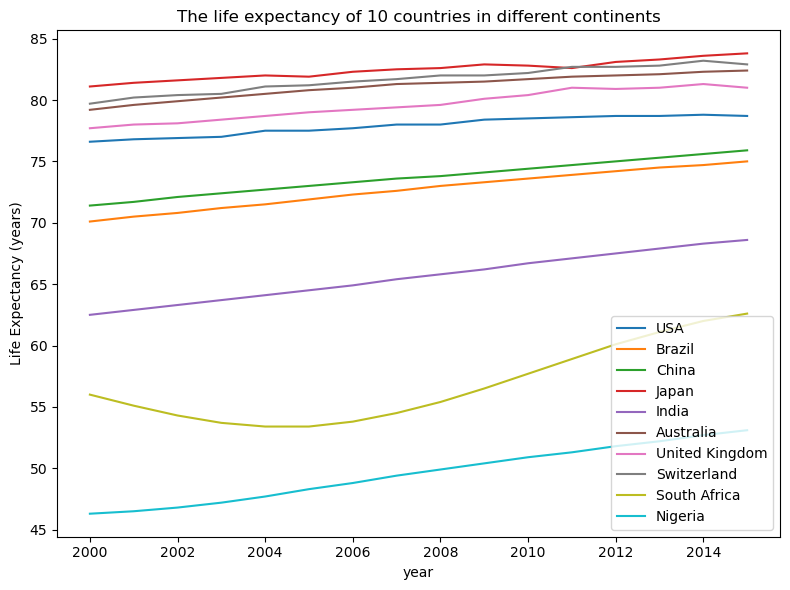

In [105]:
time = np.arange(2000,2016)
plt.figure(figsize=(8,6))
plt.plot(time,df[df['Country'] == 'United States']['Life Expectancy'])
plt.plot(time,df[df['Country'] == 'Brazil']['Life Expectancy'])
plt.plot(time,df[df['Country'] == 'China']['Life Expectancy'])
plt.plot(time,df[df['Country'] == 'Japan']['Life Expectancy'])
plt.plot(time,df[df['Country'] == 'India']['Life Expectancy'])
plt.plot(time,df[df['Country'] == 'Australia']['Life Expectancy'])
plt.plot(time,df[df['Country'] == 'United Kingdom']['Life Expectancy'])
plt.plot(time,df[df['Country'] == 'Switzerland']['Life Expectancy'])
plt.plot(time,df[df['Country'] == 'South Africa']['Life Expectancy'])
plt.plot(time,df[df['Country'] == 'Nigeria']['Life Expectancy'])
plt.xlabel('year')
plt.ylabel('Life Expectancy (years)')
plt.title('The life expectancy of 10 countries in different continents')
plt.legend(['USA','Brazil','China','Japan','India','Australia','United Kingdom','Switzerland','South Africa','Nigeria'])
plt.tight_layout()
plt.savefig('/Users/apple/Desktop/Data 1030/Individual Project/Figure/The life expectancy of 10 countries in different continents.png',dpi=600)
plt.show()

[0.9375     0.87459063 0.81167105 0.74878851 0.68586605 0.62294099
 0.56010887 0.49888154 0.43708634 0.37457001 0.31207045 0.24956859
 0.18686548 0.125             nan        nan]
[0.9375     0.85746013 0.79282623 0.7290942  0.65416649 0.60123913
 0.52950556 0.45383213 0.38833586 0.33482964 0.28944595 0.23904572
 0.14173668 0.125             nan        nan]
[0.9375     0.87448936 0.81191792 0.74913811 0.68607486 0.62386341
 0.56094792 0.49901737 0.43619941 0.37378304 0.31196022 0.24808265
 0.18739996 0.125             nan        nan]
[0.9375     0.86540596 0.79511052 0.72422739 0.66925235 0.61165081
 0.553173   0.4785434  0.40491851 0.33146888 0.28156451 0.18333333
 0.15865385 0.125             nan        nan]
[0.9375     0.87322135 0.80964826 0.74717729 0.6839668  0.61965904
 0.55856075 0.4959588  0.43332099 0.37293683 0.31013514 0.24271849
 0.18058559 0.125             nan        nan]
[ 0.9375      0.85160216  0.72610187  0.56736878  0.3711328   0.12669983
 -0.13888761 -0.3252244  -0

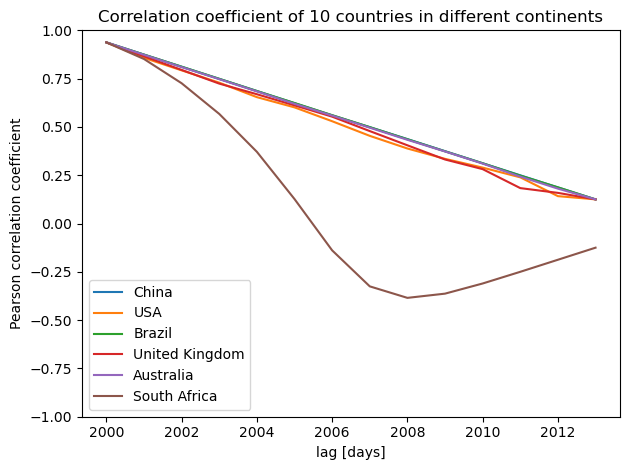

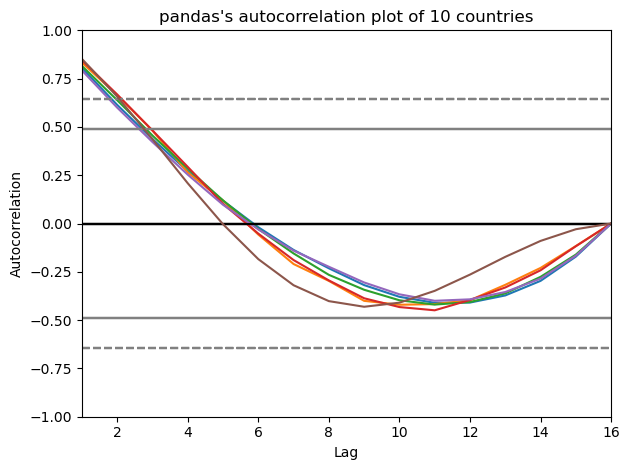

In [108]:
# let's create an autocorrelation plot

lags = np.arange(2000,2016)

df_China = df[df['Country'] == 'China']
corr_coefs_China = np.zeros(len(lags))
for i in np.arange(len(lags)):
    x = df_China['Life Expectancy'].iloc[i:-1].reset_index(drop=True) # recent observations
    y = df_China['Life Expectancy'].iloc[:-i-1].reset_index(drop=True) # lag-shifted observations
    # the shapes must be the same
    if x.shape != y.shape:
        raise ValueError('shape mismatch!')
    # Pearson correlation multiplied by the fraction of time series used
    corr_coefs_China[i] = x.corr(y,method='pearson')*x.shape[0]/df_China['Life Expectancy'].shape[0]
print(corr_coefs_China)

df_USA = df[df['Country'] == 'United States']
corr_coefs_USA = np.zeros(len(lags))
for i in np.arange(len(lags)):
    x = df_USA['Life Expectancy'].iloc[i:-1].reset_index(drop=True) # recent observations
    y = df_USA['Life Expectancy'].iloc[:-i-1].reset_index(drop=True) # lag-shifted observations
    # the shapes must be the same
    if x.shape != y.shape:
        raise ValueError('shape mismatch!')
    # Pearson correlation multiplied by the fraction of time series used
    corr_coefs_USA[i] = x.corr(y,method='pearson')*x.shape[0]/df_USA['Life Expectancy'].shape[0]
print(corr_coefs_USA)

df_Brazil = df[df['Country'] == 'Brazil']
corr_coefs_Brazil = np.zeros(len(lags))
for i in np.arange(len(lags)):
    x = df_Brazil['Life Expectancy'].iloc[i:-1].reset_index(drop=True) # recent observations
    y = df_Brazil['Life Expectancy'].iloc[:-i-1].reset_index(drop=True) # lag-shifted observations
    # the shapes must be the same
    if x.shape != y.shape:
        raise ValueError('shape mismatch!')
    # Pearson correlation multiplied by the fraction of time series used
    corr_coefs_Brazil[i] = x.corr(y,method='pearson')*x.shape[0]/df_Brazil['Life Expectancy'].shape[0]
print(corr_coefs_Brazil)

df_United_Kingdom = df[df['Country'] == 'United Kingdom']
corr_coefs_United_Kingdom = np.zeros(len(lags))
for i in np.arange(len(lags)):
    x = df_United_Kingdom['Life Expectancy'].iloc[i:-1].reset_index(drop=True) # recent observations
    y = df_United_Kingdom['Life Expectancy'].iloc[:-i-1].reset_index(drop=True) # lag-shifted observations
    # the shapes must be the same
    if x.shape != y.shape:
        raise ValueError('shape mismatch!')
    # Pearson correlation multiplied by the fraction of time series used
    corr_coefs_United_Kingdom[i] = x.corr(y,method='pearson')*x.shape[0]/df_United_Kingdom['Life Expectancy'].shape[0]
print(corr_coefs_United_Kingdom)

df_Australia = df[df['Country'] == 'Australia']
corr_coefs_Australia = np.zeros(len(lags))
for i in np.arange(len(lags)):
    x = df_Australia['Life Expectancy'].iloc[i:-1].reset_index(drop=True) # recent observations
    y = df_Australia['Life Expectancy'].iloc[:-i-1].reset_index(drop=True) # lag-shifted observations
    # the shapes must be the same
    if x.shape != y.shape:
        raise ValueError('shape mismatch!')
    # Pearson correlation multiplied by the fraction of time series used
    corr_coefs_Australia[i] = x.corr(y,method='pearson')*x.shape[0]/df_Australia['Life Expectancy'].shape[0]
print(corr_coefs_Australia)

df_South_Africa = df[df['Country'] == 'South Africa']
corr_coefs_South_Africa = np.zeros(len(lags))
for i in np.arange(len(lags)):
    x = df_South_Africa['Life Expectancy'].iloc[i:-1].reset_index(drop=True) # recent observations
    y = df_South_Africa['Life Expectancy'].iloc[:-i-1].reset_index(drop=True) # lag-shifted observations
    # the shapes must be the same
    if x.shape != y.shape:
        raise ValueError('shape mismatch!')
    # Pearson correlation multiplied by the fraction of time series used
    corr_coefs_South_Africa[i] = x.corr(y,method='pearson')*x.shape[0]/df_South_Africa['Life Expectancy'].shape[0]
print(corr_coefs_South_Africa)


plt.plot(lags,corr_coefs_China)
plt.plot(lags,corr_coefs_USA)
plt.plot(lags,corr_coefs_Brazil)
plt.plot(lags,corr_coefs_United_Kingdom)
plt.plot(lags,corr_coefs_Australia)
plt.plot(lags,corr_coefs_South_Africa)
plt.ylim([-1,1])
plt.xlabel('lag [days]')
plt.ylabel('Pearson correlation coefficient')
plt.legend(['China','USA','Brazil','United Kingdom','Australia','South Africa'])
plt.title('Correlation coefficient of 10 countries in different continents')
plt.tight_layout()
plt.savefig('/Users/apple/Desktop/Data 1030/Individual Project/Figure/Correlation coefficient of 10 countries in different continents.png',dpi=600)
plt.show()

# a one-liner
pd.plotting.autocorrelation_plot(df_China['Life Expectancy'])
pd.plotting.autocorrelation_plot(df_USA['Life Expectancy'])
pd.plotting.autocorrelation_plot(df_Brazil['Life Expectancy'])
pd.plotting.autocorrelation_plot(df_United_Kingdom['Life Expectancy'])
pd.plotting.autocorrelation_plot(df_Australia['Life Expectancy'])
pd.plotting.autocorrelation_plot(df_South_Africa['Life Expectancy'])
plt.title("pandas's autocorrelation plot of 10 countries")
# plt.legend(['China','USA','Brazil','United Kingdom','Australia','South Africa'])
plt.savefig('/Users/apple/Desktop/Data 1030/Individual Project/Figure/pandas autocorrelation plot of 10 countries.png',dpi=600)
plt.tight_layout()
plt.show()

### 3. Split Data

In [109]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [110]:
from mlxtend.evaluate import GroupTimeSeriesSplit
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from mlxtend.evaluate.time_series import (
    GroupTimeSeriesSplit,
    plot_splits,
    print_cv_info,
    print_split_info,
)

help(GroupTimeSeriesSplit)

Help on class GroupTimeSeriesSplit in module mlxtend.evaluate.time_series:

class GroupTimeSeriesSplit(builtins.object)
 |  GroupTimeSeriesSplit(test_size, train_size=None, n_splits=None, gap_size=0, shift_size=1, window_type='rolling')
 |  
 |  Group time series cross-validator.
 |  
 |  Parameters
 |  ----------
 |  test_size : int
 |      Size of test dataset.
 |  train_size : int (default=None)
 |      Size of train dataset.
 |  n_splits : int (default=None)
 |      Number of the splits.
 |  gap_size : int (default=0)
 |      Gap size between train and test datasets.
 |  shift_size : int (default=1)
 |      Step to shift for the next fold.
 |  window_type : str (default="rolling")
 |      Type of the window. Possible values: "rolling", "expanding".
 |  
 |  Examples
 |  -----------
 |  For usage examples, please see
 |  https://rasbt.github.io/mlxtend/user_guide/evaluate/GroupTimeSeriesSplit/
 |  
 |  Methods defined here:
 |  
 |  __init__(self, test_size, train_size=None, n_split

In [111]:
data = df
data.sort_values(by='Year',ascending=True,inplace=True)
data = data.reset_index(drop=True)
data.head()

,Country,Region,Year,Infant Deaths,Under_Five Deaths,Adult Mortality,Alcohol Consumption,Hepatitis B,Measles,BMI,Polio,Diphtheria,Incidents of HIV,GDP(per capita),Population,Thinness (ten to nineteen years),Thinness (five to nine years),Schooling,Life Expectancy,Economy Status
0,Afghanistan,Asia,2000,90.5,129.2,310.8305,0.02,62,12,21.7,24,24,0.02,148,20.78,2.3,2.5,2.2,55.8,Developing
1,"Egypt, Arab Rep.",Africa,2000,37.1,46.6,175.9240,0.14,98,64,27.6,98,98,0.13,2610,68.83,3.6,3.5,4.8,68.6,Developing
2,Panama,Central America and Caribbean,2000,21.9,26.0,124.8690,5.08,98,88,25.6,99,98,0.40,6955,3.03,2.4,2.3,8.5,75.1,Developing
3,Ukraine,Rest of Europe,2000,15.7,18.3,256.5475,6.95,66,99,25.7,99,99,0.67,1420,49.18,3.0,3.1,10.7,67.7,Developing
4,Ecuador,South America,2000,24.7,29.5,158.0270,4.01,36,95,25.3,83,87,0.23,4209,12.68,1.6,1.5,7.0,72.8,Developing


In [112]:
X = data.drop(columns=['Life Expectancy'])
y = data['Life Expectancy']
groups = data['Year']

groups_len = groups.nunique()

gtss_1 = GroupTimeSeriesSplit(test_size=int(0.125*groups_len),n_splits=1)
for other_id, test_id in gtss_1.split(X, y, groups):

    X_other, y_other, groups_other = X.iloc[other_id], y.iloc[other_id], groups.iloc[other_id]
    X_test, y_test, groups_test = X.iloc[test_id], y.iloc[test_id], groups.iloc[test_id]

gtss_2 = GroupTimeSeriesSplit(test_size=int(0.125*groups_len),n_splits=1)
for train_id, val_id in gtss_2.split(X_other, y_other, groups=groups_other):
    X_train, y_train, groups_train = X_other.iloc[train_id], y_other.iloc[train_id], groups_other.iloc[train_id]
    X_val, y_val, groups_val = X_other.iloc[val_id], y_other.iloc[val_id], groups_other.iloc[val_id]


print("Train id: ", train_id, "\n", "Validation id: ", val_id, "\n","Test id: ", test_id, "\n")
print("Train dates: ", X.loc[train_id, "Year"].unique(), "\n", "Validation dates: ", X.loc[val_id, "Year"].unique(), "\n", "Test dates: ", X.loc[test_id, "Year"].unique(), "\n")

Train id:  [   0    1    2 ... 2145 2146 2147] 
 Validation id:  [2148 2149 2150 2151 2152 2153 2154 2155 2156 2157 2158 2159 2160 2161
 2162 2163 2164 2165 2166 2167 2168 2169 2170 2171 2172 2173 2174 2175
 2176 2177 2178 2179 2180 2181 2182 2183 2184 2185 2186 2187 2188 2189
 2190 2191 2192 2193 2194 2195 2196 2197 2198 2199 2200 2201 2202 2203
 2204 2205 2206 2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217
 2218 2219 2220 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231
 2232 2233 2234 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245
 2246 2247 2248 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259
 2260 2261 2262 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273
 2274 2275 2276 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287
 2288 2289 2290 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301
 2302 2303 2304 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315
 2316 2317 2318 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329
 2330 2331 2

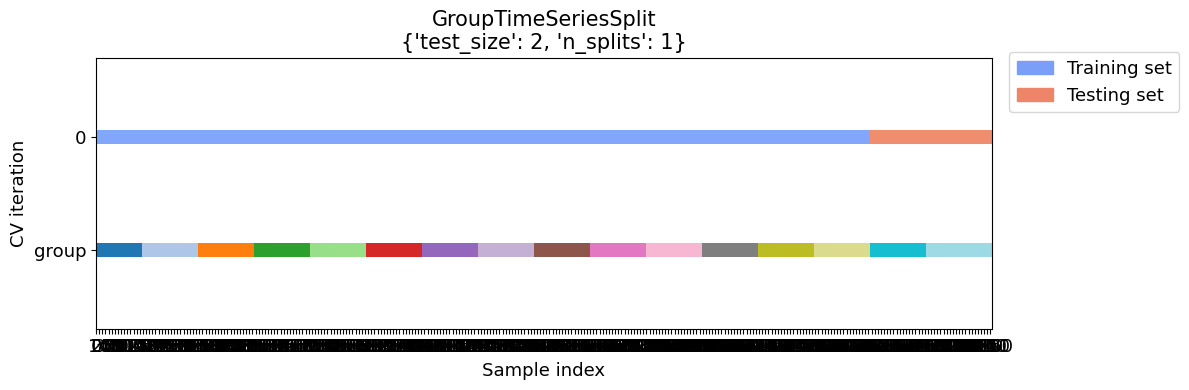

In [113]:
# Visualization
cv_args = {"test_size": int(0.125*groups_len), "n_splits": 1}
plot_splits(X, y, groups, **cv_args)

### 4. Preprocessing data

In [115]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler


# collect which encoder to use on each feature
# needs to be done manually
ordinal_ftrs = ['Economy Status'] 
ordinal_cats = [['Developed','Developing']]
onehot_ftrs = ['Country','Region']
minmax_ftrs = ['Schooling']
std_ftrs = ['Infant Deaths', 'Under_Five Deaths',
       'Adult Mortality', 'Alcohol Consumption', 'Hepatitis B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents of HIV', 'GDP(per capita)',
       'Population', 'Thinness (ten to nineteen years)',
       'Thinness (five to nine years)' ]

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_val.shape)
print(X_val_prep.shape)
print(X_test.shape)
print(X_test_prep.shape)


(2148, 19)
(2148, 204)
(358, 19)
(358, 204)
(358, 19)
(358, 204)


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
